In [32]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import nibabel as nb
import hrf_tools
import hcp_utils as hcp

In [2]:
subject=100610
feature='rms'
#n_movies=4
#vertex_info = hcp.get_HCP_vertex_info(img)
scaler = StandardScaler()

In [8]:
im_file = f'../sourcedata/data/HCP_7T_movie_FIX/brain/HCP_7T_movie_FIX/100610/MNINonLinear/Results/tfMRI_MOVIE1_7T_AP/tfMRI_MOVIE1_7T_AP_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries.nii'
img = nb.load(im_file)
img_y = img.get_fdata()
Y = scaler.fit_transform(img_y)
#load feature
X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_rms.npy')
X = hrf_tools.apply_optimal_hrf_10hz(X,10)
X = hrf_tools.resample_1hz(X)
X = X[:Y.shape[0],:] # if it has one extra value

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [9]:
n_scans = Y.shape[0]
frame_times= np.arange(n_scans)

In [10]:
from nilearn.glm.first_level import make_first_level_design_matrix
design_matrix = make_first_level_design_matrix(frame_times, None,
                          add_regs=X, hrf_model=None, drift_model=None)

<AxesSubplot:label='conditions', ylabel='scan number'>

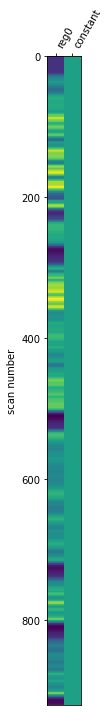

In [11]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)

In [27]:
from nilearn.glm.first_level import run_glm
labels,results = run_glm(Y,design_matrix.values)

In [31]:
from nilearn.glm.contrasts import compute_contrast
contrast = compute_contrast(labels=labels, \
                            regression_result=results, \
                            con_val=np.array([1,0]).T, \
                            contrast_type='t')